## Look at the Big Picture and Frame the Problem

#### Frame the Problem
1. Supervised Learning: Data is labeled
2. Regression Task: We are predicting a numerical value (Wage of data scientist)
3. Batch Learning:
    - Small dataset
    - No need to add new instances to data
#### Look at the Big Picture
Taking a look at the bigger picture, the business objective of this project is to assist data science companies such as NVIDIA, IBM, OpenText, and more to be able to budget their data scientists more accurately compared to the average salary amount a data scientist should be earning depending on many factors including work year, experience level, and specific field of data science. Companies should expect to use our project and benefit from it by being able to predict how much their employees should be making and how much they might make in the future if they keep the same position down the line. This will help companies with budgeting there money as they know what to expect to spend on employees including new hires, and can use that knowledge to budget more accordingly.

## Load the Dataset

### Required Imports

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sb

Given the datasets url, load in the csv file using pandas.

In [212]:
url = "https://raw.githubusercontent.com/SCI-co-Newb/datasets/main/ds_salaries.csv"
data = pd.read_csv(url)

data_backup = data
data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


## Exploratory Data Analysis

In [213]:
# Delete duplicate column "unamed: 0"

data.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [214]:
# We will first get a quick summary of the numerical features

data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [215]:
# We check to see what data types the features are
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


### Bar Graphs

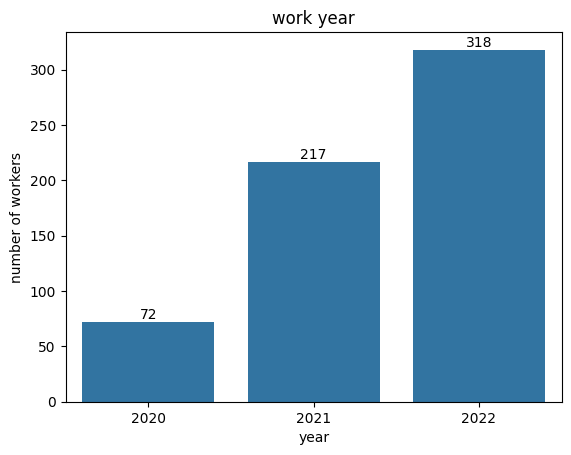

In [216]:
# We look to see where most of our data is taken

ax = sb.barplot(x=data['work_year'].value_counts().index, y=data['work_year'].value_counts())
ax.set(title = 'work year', xlabel = 'year', ylabel = 'number of workers')
ax.bar_label(ax.containers[0])
plt.show()

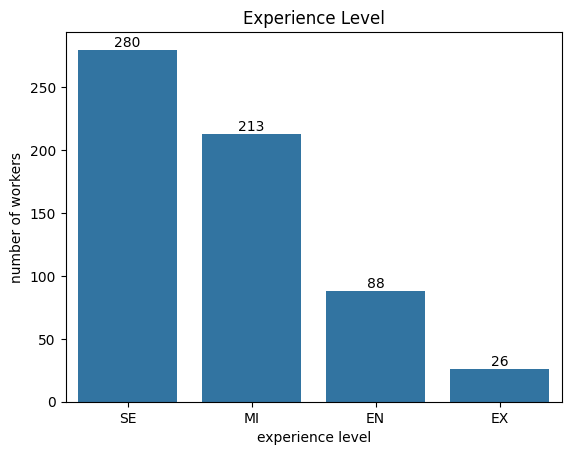

In [217]:
# We look to see what types of levels are present
#SE is senior, MI Junior-midlevel, EN is entry level and EX is executive level

ax = sb.barplot(x=data['experience_level'].value_counts().index, y=data['experience_level'].value_counts())
ax.set(title = 'Experience Level', xlabel = 'experience level', ylabel = 'number of workers')
ax.bar_label(ax.containers[0])
plt.show()

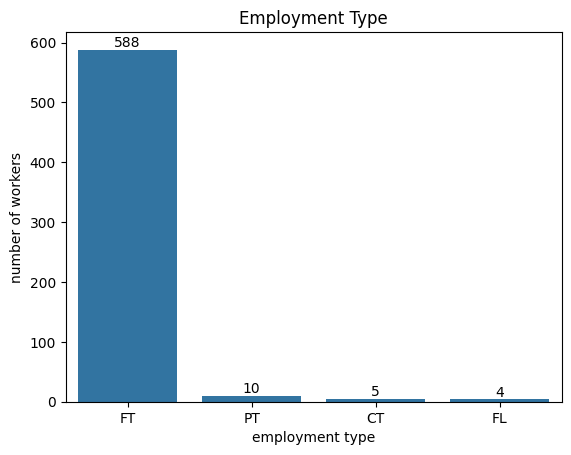

In [218]:
# We look to see how many of each type of employment have been recorded
#FT is full time, PT is part time, CT is contract and FL is freelance

ax = sb.barplot(x=data['employment_type'].value_counts().index, y=data['employment_type'].value_counts())
ax.set(title = 'Employment Type', xlabel = 'employment type', ylabel = 'number of workers')
ax.bar_label(ax.containers[0])
plt.show()

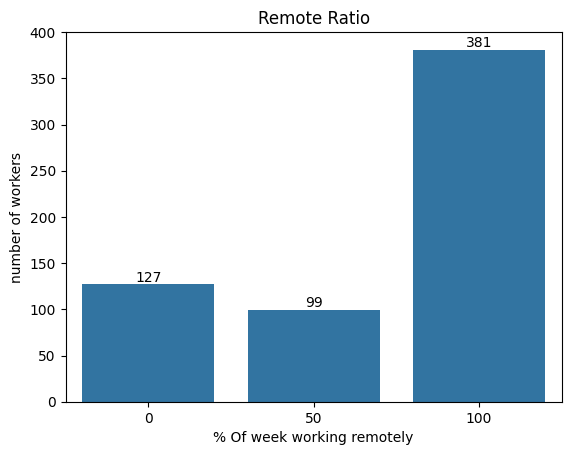

In [219]:
# We look to see how many people working are fully, partially and not remote

ax = sb.barplot(x=data['remote_ratio'].value_counts().index, y=data['remote_ratio'].value_counts())
ax.set(title = 'Remote Ratio', xlabel = '% Of week working remotely', ylabel = 'number of workers')
ax.bar_label(ax.containers[0])
plt.show()

<Axes: title={'center': 'Job title vs number of workers'}, xlabel='Job Titles', ylabel='number of workers'>

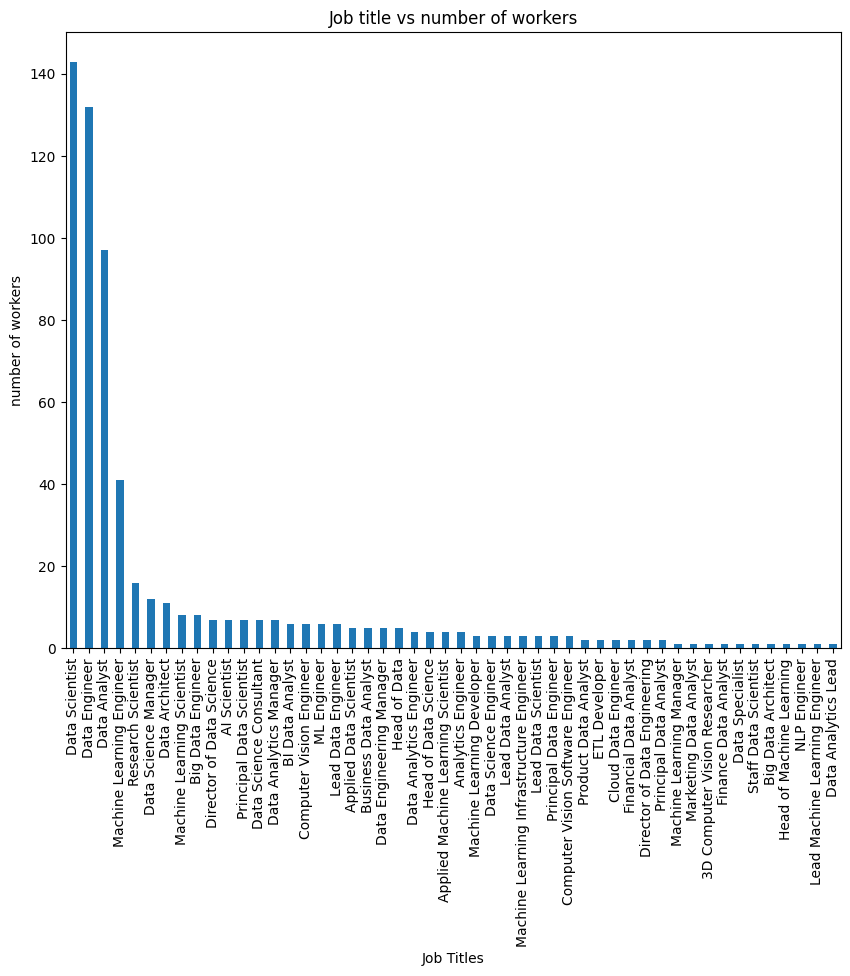

In [220]:
# What are the job titles of participants in the dataset

data['job_title'].value_counts().plot(kind='bar', title='Job title vs number of workers', xlabel='Job Titles', ylabel='number of workers',  figsize=(10,8))

<Axes: title={'center': 'Company Location vs number of workers'}, xlabel='Countries', ylabel='number of workers'>

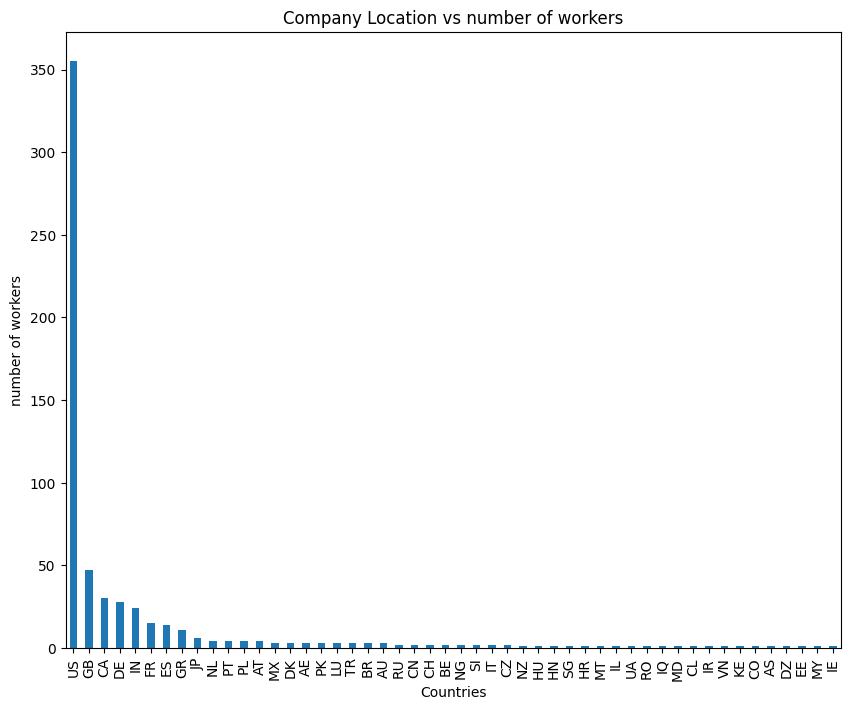

In [221]:
# Check what countries have we have access to

data['company_location'].value_counts().plot(kind='bar', title='Company Location vs number of workers', xlabel='Countries', ylabel='number of workers',  figsize=(10,8))

### Contingency Table

experience_level  EN  EX   MI   SE
employment_type                   
CT                 2   1    1    1
FL                 0   0    3    1
FT                79  25  206  278
PT                 7   0    3    0


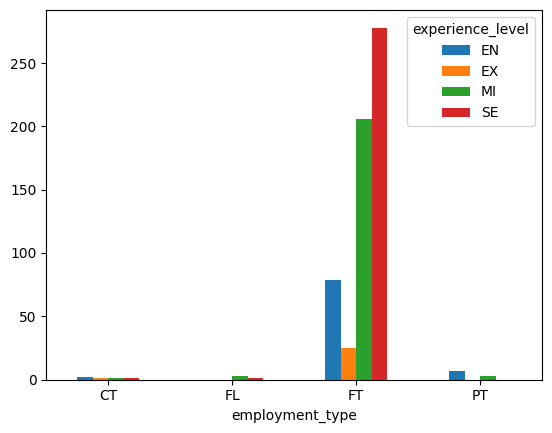

In [222]:
# We can compare the employment type for expereince level

crosstb_salary_year = pd.crosstab(data['employment_type'],data['experience_level'])
print(crosstb_salary_year)
barplot = crosstb_salary_year.plot.bar(rot=0)

### Scatter Plot

Text(0, 0.5, 'Salary in USD')

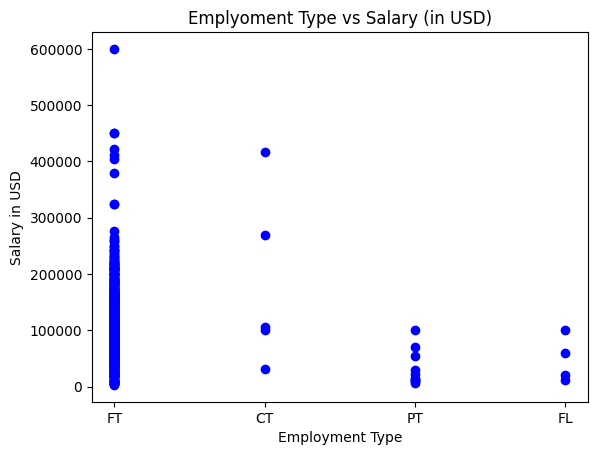

In [223]:
# We are going to use a scatter plot to view how the type of employment affects the average salary in USD

X = data["employment_type"]
y = data["salary_in_usd"]
# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, color = 'b')
plt.title("Emplyoment Type vs Salary (in USD)")
plt.xlabel("Employment Type")
plt.ylabel("Salary in USD")

Text(0, 0.5, 'Salary in USD')

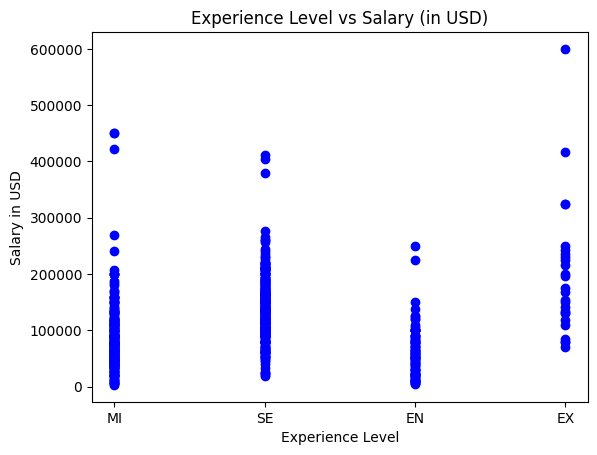

In [224]:
# We are going to use a scatter plot to view how the type of employment affects the average salary in USD

X = data["experience_level"]
y = data["salary_in_usd"]
# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, color = 'b')
plt.title("Experience Level vs Salary (in USD)")
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD")

### Create a correaltion matrix and corresponding line plot and scatter plot

In [225]:
# Here we are just loading a correlation matrix

corr_matrix = data.corr(numeric_only=True)
corr_matrix

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.087577,0.170493,0.076314
salary,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.076314,-0.014608,0.132122,1.000000


In [226]:
# Look at the correlations with respect to our target value (salary_in_usd)

corr_matrix["salary_in_usd"].sort_values(ascending=False)

salary_in_usd    1.000000
work_year        0.170493
remote_ratio     0.132122
salary          -0.083906
Name: salary_in_usd, dtype: float64

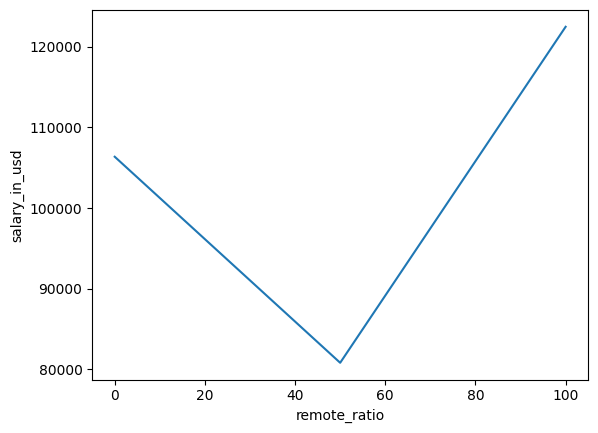

In [227]:
# Make a lineplot between the two most realistic related values (salary in USD and remote ratio)

SUDvsRR = sb.lineplot(x="remote_ratio", y="salary_in_usd", data=data, errorbar=None)

# Prepare Data

In [228]:
# Check for null values

data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [229]:
# Check for duplicated rows

data.duplicated().sum()

42

In [230]:
data.drop_duplicates()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [231]:
# We remove features which have high cardinality and low value to our task

data.drop(labels=['salary_currency', 'salary'], axis=1, inplace=True)
data


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


We create a pipeline for preprocessing the data before it is split. If there exists any empty values we repalce with the mean if they are numerical or with most frequent if they are categorical. 

In [232]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer

num_cols = data.select_dtypes(include='number').columns.to_list()
cat_cols = data.select_dtypes(exclude='number').columns.to_list()

num_cols.remove("salary_in_usd")


num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
# We use ordinal encoder because the features have natural rank making them ordinal variables
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder())

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                  remainder='passthrough'
                                 )

data_prepared = preprocessing.fit_transform(data)

feature_names = preprocessing.get_feature_names_out()
data_prepared = pd.DataFrame(data=data_prepared, columns=feature_names)

data_prepared

,num__work_year,num__remote_ratio,cat__experience_level,cat__employment_type,cat__job_title,cat__employee_residence,cat__company_location,cat__company_size,remainder__salary_in_usd
0,-2.032024,-1.743615,2.0,2.0,22.0,14.0,12.0,0.0,79833.0
1,-2.032024,-1.743615,3.0,2.0,41.0,32.0,29.0,2.0,260000.0
2,-2.032024,-0.514377,3.0,2.0,7.0,20.0,18.0,1.0,109024.0
3,-2.032024,-1.743615,2.0,2.0,47.0,23.0,20.0,2.0,20000.0
4,-2.032024,-0.514377,3.0,2.0,38.0,55.0,48.0,0.0,150000.0
...,...,...,...,...,...,...,...,...,...
602,0.859977,0.714862,3.0,2.0,17.0,55.0,48.0,1.0,154000.0
603,0.859977,0.714862,3.0,2.0,17.0,55.0,48.0,1.0,126000.0
604,0.859977,-1.743615,3.0,2.0,12.0,55.0,48.0,1.0,129000.0
605,0.859977,0.714862,3.0,2.0,12.0,55.0,48.0,1.0,150000.0


In [233]:
corr_matrix = data_prepared.corr(numeric_only=True) #[TODO]
corr_matrix["remainder__salary_in_usd"].sort_values(ascending=False)

remainder__salary_in_usd    1.000000
cat__employee_residence     0.452501
cat__company_location       0.428994
cat__experience_level       0.315312
num__work_year              0.170493
num__remote_ratio           0.132122
cat__job_title              0.131016
cat__employment_type       -0.123545
cat__company_size          -0.151205
Name: remainder__salary_in_usd, dtype: float64

In [234]:
from sklearn.model_selection import train_test_split

X = data_prepared.drop(["remainder__salary_in_usd"], axis=1)
y = data_prepared["remainder__salary_in_usd"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(485, 8) (485,) (122, 8) (122,)


# Algorithm 1: Linear Regression

In [235]:
# Here we intialize the model with no regualrization

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)

LinearRegression()

In [236]:
# Training the model and measure its perforamnce with the mean absolute error 
lr_y_predict = lr_model.predict(X_test)

# We use mean absolute error to have a better picture of how far off the model is
from sklearn.metrics import mean_absolute_error as mae
lr_mae=mae(y_test, lr_y_predict)
lr_mae

35573.69677653497

In [237]:
# Added cross-validation score 5 folds and reported on negative mean squared error

from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cross_validation_scores = -scores.mean()  # Take the negative value to get the mean squared error

print(f'Cross-Validation Mean Score: {cross_validation_scores}')

Cross-Validation Mean Score: 42981.07921530631


In [238]:
# Use Lasso Regression because we want to penalize the absolute error

from sklearn.linear_model import Lasso

LassoRegression = Lasso(alpha=1)
lasso_model = LassoRegression.fit(X_train, y_train)

Lasso_y_predict = lasso_model.predict(X_test)
lasso_mae=mae(y_test, Lasso_y_predict)
print(f'Lasso Regression MAE: {lasso_mae}')

Lasso Regression MAE: 35574.014518814045


In [239]:
# Summary of linear Regression models

print(f'Linear Regression MAE: {lr_mae}')
print(f'Cross-Validation Mean Score: {cross_validation_scores}')
print(f'Lasso Regression MAE: {lasso_mae}')

Linear Regression MAE: 35573.69677653497
Cross-Validation Mean Score: 42981.07921530631
Lasso Regression MAE: 35574.014518814045


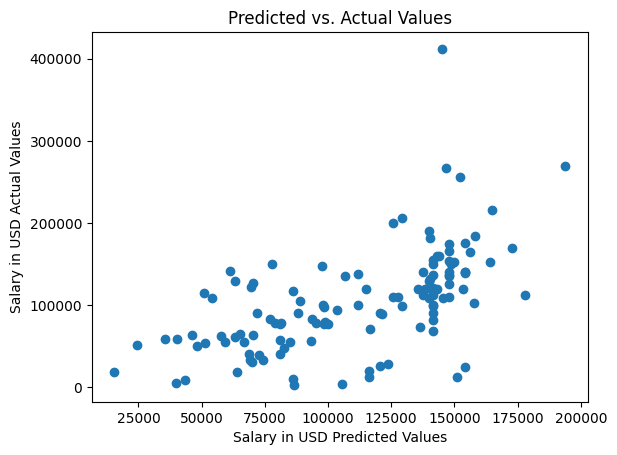

In [240]:
# Linear Regression (No Regularization) scored the best

plt.scatter(lr_y_predict, y_test)
plt.xlabel("Salary in USD Predicted Values")
plt.ylabel("Salary in USD Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

Lasso Regression MAE: 35574.014518814045


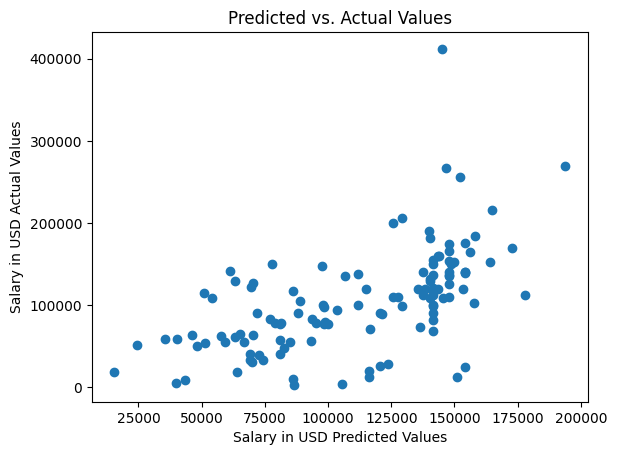

In [241]:
# Lasso Regression was the second best

print(f'Lasso Regression MAE: {lasso_mae}')
plt.scatter(Lasso_y_predict, y_test)
plt.xlabel("Salary in USD Predicted Values")
plt.ylabel("Salary in USD Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

# Algorithm 2: Support Vector Machines (SVR)

In [242]:
# Import the SVR model
from sklearn.svm import SVR
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [243]:
# We use GridSearch CV to find the best value of Kernel, Gamma and C
# Split the data into 60% training, 20% validation and 20% training

X_train, X_validation_test, y_train, y_validation_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(364, 8) (364,) (121, 8) (121,) (122, 8) (122,)


In [244]:
from sklearn.model_selection import GridSearchCV

svr_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10],
                  'gamma': [0.01, 1, 10]
                }
svr_gs = GridSearchCV(estimator = SVR(),
                      param_grid = svr_parameters)
svr_gs.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())

svr_winner = svr_gs.best_estimator_
svr_winner # we use resulting C and gamma to perform the training

SVR(C=10, gamma=0.01)

Support Vector Mean Absolute Error (Kernel=rbf): 42853.03114333357


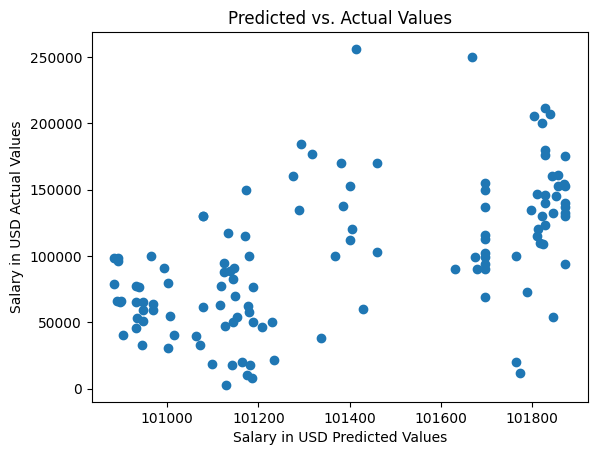

In [245]:
# We try with kernel = rbf
svr_rbf = SVR(kernel="rbf", C=10, gamma=0.01)
svr_rbf.fit(X_train, y_train)


SVR_rbf_y_predict=svr_rbf.predict(X_test)
svr_rbf_mae=mae(y_test, SVR_rbf_y_predict)

print(f'Support Vector Mean Absolute Error (Kernel=rbf): {svr_rbf_mae}')

plt.scatter(SVR_rbf_y_predict, y_test)  
plt.xlabel("Salary in USD Predicted Values")
plt.ylabel("Salary in USD Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

Support Vector Mean Absolute Error (Kernel=linear): 34861.06491508675


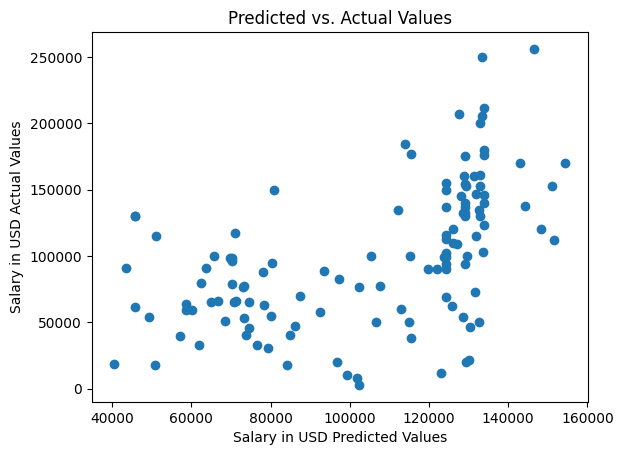

In [246]:
# We try with kernel = linear
svr_linear = SVR(kernel="linear", C=10, gamma=0.01)
svr_linear.fit(X_train, y_train)

SVR_linear_y_predict=svr_linear.predict(X_test)
svr_linear_mae=mae(y_test, SVR_linear_y_predict)

print(f'Support Vector Mean Absolute Error (Kernel=linear): {svr_linear_mae}')
plt.scatter(SVR_linear_y_predict, y_test)  
plt.xlabel("Salary in USD Predicted Values")
plt.ylabel("Salary in USD Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

Support Vector Mean Absolute Error (Kernel=poly): 31927.571950382164


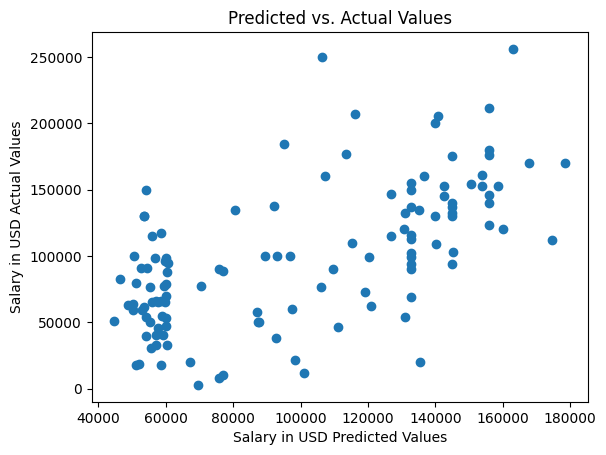

In [247]:
# We try with kernel = poly
svr_poly = SVR(kernel="poly", C=10, gamma=0.01)
svr_poly.fit(X_train, y_train)

SVR_poly_y_predict=svr_poly.predict(X_test)
svr_poly_mae=mae(y_test, SVR_poly_y_predict)

print(f'Support Vector Mean Absolute Error (Kernel=poly): {svr_poly_mae}')
plt.scatter(SVR_poly_y_predict, y_test)  
plt.xlabel("Salary in USD Predicted Values")
plt.ylabel("Salary in USD Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

In [248]:
print(f'Support Vector Mean Absolute Error (Kernel=rbf): {svr_rbf_mae}')
print(f'Support Vector Mean Absolute Error (Kernel=linear): {svr_linear_mae}')
print(f'Support Vector Mean Absolute Error (Kernel=poly): {svr_poly_mae}')


Support Vector Mean Absolute Error (Kernel=rbf): 42853.03114333357
Support Vector Mean Absolute Error (Kernel=linear): 34861.06491508675
Support Vector Mean Absolute Error (Kernel=poly): 31927.571950382164


# Algorithm 3: Decesion Trees

In [249]:
# Import and train the decesion tree
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(max_depth=2)
dt_regressor.fit(X, y)

dt_regressor_y_predict=dt_regressor.predict(X_test)
dt_regressorr_mae=mae(y_test, dt_regressor_y_predict)
dt_regressorr_mae


29860.683241202274

[Text(0.5, 0.8333333333333334, 'x[5] <= 54.5\nsquared_error = 5026637881.194\nsamples = 607\nvalue = 112297.87'),
 Text(0.25, 0.5, 'x[2] <= 2.5\nsquared_error = 1856647027.229\nsamples = 272\nvalue = 68161.618'),
 Text(0.125, 0.16666666666666666, 'squared_error = 1541185059.32\nsamples = 204\nvalue = 60071.667'),
 Text(0.375, 0.16666666666666666, 'squared_error = 2017665248.573\nsamples = 68\nvalue = 92431.471'),
 Text(0.75, 0.5, 'x[4] <= 23.5\nsquared_error = 4734595364.118\nsamples = 335\nvalue = 148133.872'),
 Text(0.625, 0.16666666666666666, 'squared_error = 3192950455.968\nsamples = 284\nvalue = 138681.493'),
 Text(0.875, 0.16666666666666666, 'squared_error = 10051268659.052\nsamples = 51\nvalue = 200770.647')]

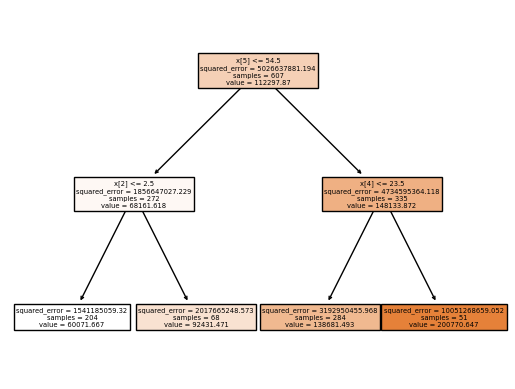

In [250]:
# Draw the tree
from sklearn import tree

tree.plot_tree(dt_regressor, filled=True)